In [6]:
import numpy as np
from scipy.spatial import ConvexHull
from scipy.spatial import HalfspaceIntersection
import matplotlib.pyplot as plt
import cvxpy as cp

# Set up plot style
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 20,
    "figure.figsize": (9, 9), 
    "figure.dpi": 100})

## Make a constraint set

In [7]:
# Generate random points
n = 2 # Dimension

# random et convex hull
N = 10 # Number of points
#M = np.random.randn(N, n)

#set from lecture 
M = np.array([[-1/2,-1/2],[-1/2,2],[2,-1/2],[2,1],[1, 2]])

hull = ConvexHull(M)

# Hyperplane representation
A, b = hull.equations[:, :-1], -hull.equations[:, -1]  
print(A)
print(b)
c = -np.random.randn(n); c/=np.linalg.norm(c)*2  # Normalize c by its norm  

[[-0.         -1.        ]
 [-1.          0.        ]
 [ 1.         -0.        ]
 [ 0.          1.        ]
 [ 0.70710678  0.70710678]]
[0.5        0.5        2.         2.         2.12132034]


In [8]:
from IPython.display import display, Math, Latex
string = r'\begin{{array}}{{ll}}\mbox{{minimize}} & {0:.2f} x_1 + {1:.2f} x_2\\'.format(c[0], c[1])
string +=  r'\mbox{{subject to}} & {0:.2f}x_1 + {1:.2f}x_2 \le {2:.2f}\\'.format(A[0, 0], A[0, 1], b[0])
for i in range(1, A.shape[0]):
    string +=  r' & {0:.2f}x_1 + {1:.2f}x_2 \le {2:.2f}\\'.format(A[i, 0], A[i, 1], b[i])
string += r'\end{array}'
display(Math(string))

<IPython.core.display.Math object>

In [9]:
# Solve with CVXPY
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c @ x), [A @ x <= b])
prob.solve()
x_sol = x.value

(-1.5, 3.0)

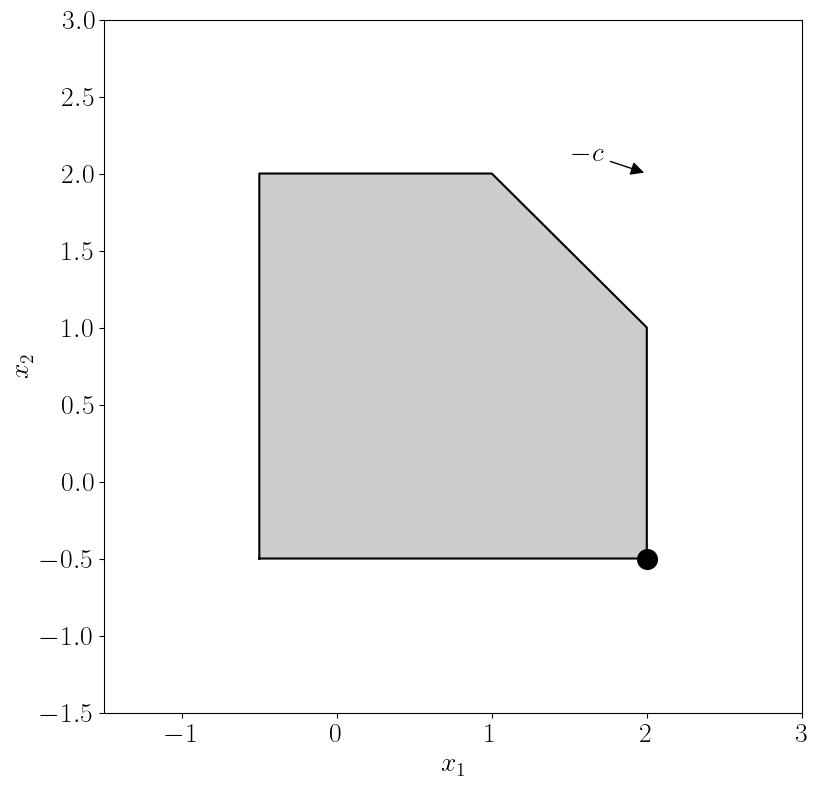

In [10]:
# Plot points
V = M[hull.vertices]  # Vertices
x_min, x_max = V[:, 0].min(), V[:, 0].max()
y_min, y_max = V[:, 1].min(), V[:, 1].max()
fig, ax = plt.subplots()
# Not: append last point to close the black lines
ax.plot(np.append(V[:, 0], V[0, 0]), np.append(V[:, 1], V[0, 1]), color='k')
ax.fill(V[:, 0], V[:, 1], 'k', alpha=0.2)
ax.annotate(r'$-c$', xy=(x_max, y_max), xytext=(x_max + c[0], y_max + c[1]),
            arrowprops={'arrowstyle': '-|>', 'color': 'k'},
            va='center')
ax.scatter(x_sol[0], x_sol[1], facecolors='k', edgecolors='k', s=200, zorder=10)
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
ax.set_xlim([x_min - 1, x_max + 1])
ax.set_ylim([y_min - 1, y_max + 1])
# plt.axis('off')